In [2]:
#Get the iWidget stuff
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import os
import sys

sys.path.append('/home/michael/jupyter/local-packages')

# Get my Utilities (localUtilities)
from localUtilities import dateUtils, ibPyUtils, configIB 

import numpy as np
import pandas as pd
import datetime
import random
import itertools
from IPython.display import display, HTML

# matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# #interactive Shell to see variables outside of print() function - 
# #  if this is on one can suppress output by adding a ';' at the end of line 
# #   not 100% clear which variables this supresses 
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Doc is here: https://ib-insync.readthedocs.io/readme.html
from ib_insync import *
util.startLoop()

ib = IB()
# Connect to IB Gateway / Paper Trade 4002 
#            TWS        / Paper Trade 7495
ib.connect('127.0.0.1', configIB.IB_PAPER_TRADE_PORT, clientId=3)

<IB connected to 127.0.0.1:4002 clientId=3>

In [3]:
#See if connected 
ib.isConnected()

True

In [ ]:
#disconnect
ib.disconnect()

In [9]:
theStock = 'AAPL'
earningsDate4 = ['04/30/2019','08:00PM']
earningsDate3 = ['01/29/2019','09:00PM']
earningsDate2 = ['11/01/2018','08:00PM']
earningsDate1 = ['07/31/2018','08:00PM']

#===============================================

contract = Stock(theStock, 'SMART', 'USD')

# Create a list of list w/ Earning String Dates
earningDates = [earningsDate1, earningsDate2, earningsDate3, earningsDate4]
# Create a list of Earning datetime Dates from earningDates Strings
earningDateTime = [datetime.datetime.strptime(aDate[0]+aDate[1], '%m/%d/%Y%I:%M%p') for aDate in earningDates]
# Put in Panda DataFrame
earningsCalendar = pd.DataFrame({'EarningStrDate': earningDates,
                                 'EarningDateTime': earningDateTime})

In [10]:

# # add daysAroundEarnings Days forward - this will be used to count back and plot time
# # durationString,The amount of time (or Valid Duration String units) to go back from the request's given end date and time.

# add X(daysPassEarnings) Days forward past earnings - this will be used to count back
daysPassEarnings = 60

# How far back from daysPassEarnings
durationStrDays = '90 D'
# Bar size
setBarSizeSetting = '1 day'

#create time series panda dataframes from IB
earningsPastStock = []
earningsPastImpVol=[]

for earnData in range(0, len(earningsCalendar)):
        earningsPastStock.append(util.df(ib.reqHistoricalData(contract, endDateTime=earningsCalendar['EarningDateTime'][earnData]
                                                              +datetime.timedelta(days=daysPassEarnings),  
                                                              durationStr=durationStrDays,barSizeSetting=setBarSizeSetting, 
                                                              whatToShow='TRADES', useRTH=True)))
        earningsPastImpVol.append(util.df(ib.reqHistoricalData(contract, endDateTime=earningsCalendar['EarningDateTime'][earnData]
                                                               +datetime.timedelta(days=daysPassEarnings), 
                                                               durationStr=durationStrDays,barSizeSetting=setBarSizeSetting, 
                                                               whatToShow='OPTION_IMPLIED_VOLATILITY', useRTH=True)))


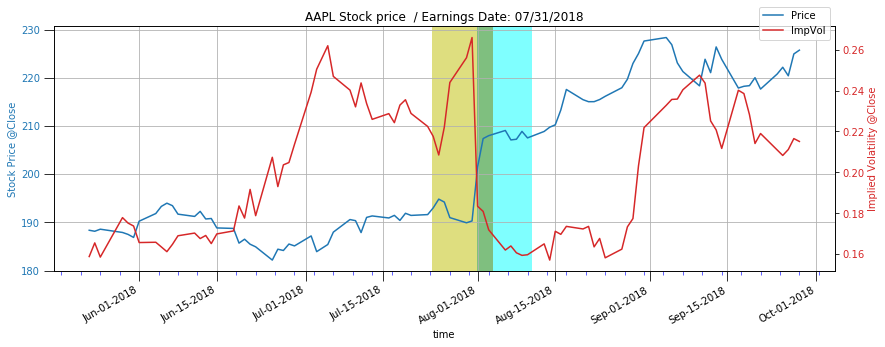

Earning Price Max:   19.95
Earning Price Min:   -0.38
Earning Price Max % Delta:   9.49
Earning Price Min % Delta:   -0.2


,date,close,earningDayPriceDelta,earningDayPercentDelta
date,,,,
2018-07-16,2018-07-16,190.91,0.62,0.32
2018-07-17,2018-07-17,191.45,1.16,0.61
2018-07-18,2018-07-18,190.40,0.11,0.06
2018-07-19,2018-07-19,191.88,1.59,0.83
2018-07-20,2018-07-20,191.44,1.15,0.60
2018-07-23,2018-07-23,191.61,1.32,0.69
2018-07-24,2018-07-24,193.00,2.71,1.40
2018-07-25,2018-07-25,194.82,4.53,2.33
2018-07-26,2018-07-26,194.21,3.92,2.02


Earning ImpVol Max:   0.0
Earning ImpVol Min:   -0.11
Earning ImpVol Max % Delta:   0.0
Earning ImpVol Min % Delta:   -69.0


,date,close,earningDayIVPriceDelta,earningDayIVPercentDelta
date,,,,
2018-07-16,2018-07-16,0.228720,-0.04,-16.0
2018-07-17,2018-07-17,0.224307,-0.04,-19.0
2018-07-18,2018-07-18,0.232895,-0.03,-14.0
2018-07-19,2018-07-19,0.235514,-0.03,-13.0
2018-07-20,2018-07-20,0.228831,-0.04,-16.0
2018-07-23,2018-07-23,0.222465,-0.04,-20.0
2018-07-24,2018-07-24,0.217592,-0.05,-22.0
2018-07-25,2018-07-25,0.208496,-0.06,-28.0
2018-07-26,2018-07-26,0.222084,-0.04,-20.0


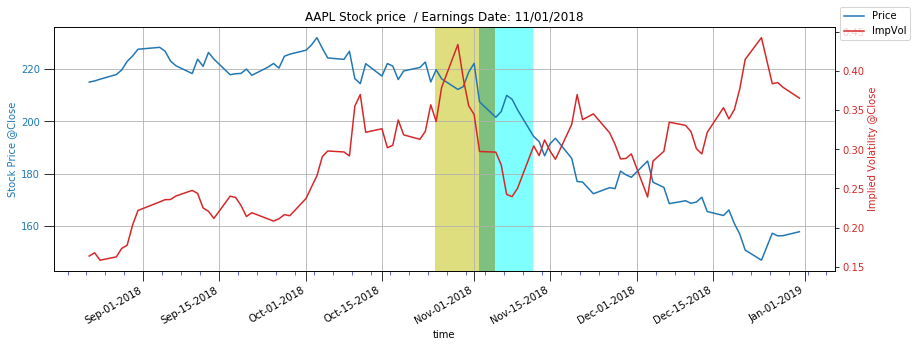

Earning Price Max:   0.51
Earning Price Min:   -35.42
Earning Price Max % Delta:   0.23
Earning Price Min % Delta:   -18.96


,date,close,earningDayPriceDelta,earningDayPercentDelta
date,,,,
2018-10-17,2018-10-17,221.19,-1.03,-0.47
2018-10-18,2018-10-18,216.02,-6.20,-2.87
2018-10-19,2018-10-19,219.31,-2.91,-1.33
2018-10-22,2018-10-22,220.65,-1.57,-0.71
2018-10-23,2018-10-23,222.73,0.51,0.23
2018-10-24,2018-10-24,215.09,-7.13,-3.31
2018-10-25,2018-10-25,219.80,-2.42,-1.10
2018-10-26,2018-10-26,216.30,-5.92,-2.74
2018-10-29,2018-10-29,212.24,-9.98,-4.70


Earning ImpVol Max:   0.09
Earning ImpVol Min:   -0.11
Earning ImpVol Max % Delta:   21.0
Earning ImpVol Min % Delta:   -44.0


,date,close,earningDayIVPriceDelta,earningDayIVPercentDelta
date,,,,
2018-10-17,2018-10-17,0.305283,-0.04,-13.0
2018-10-18,2018-10-18,0.337714,-0.01,-2.0
2018-10-19,2018-10-19,0.318633,-0.03,-8.0
2018-10-22,2018-10-22,0.312902,-0.03,-10.0
2018-10-23,2018-10-23,0.323110,-0.02,-7.0
2018-10-24,2018-10-24,0.357065,0.01,3.0
2018-10-25,2018-10-25,0.335762,-0.01,-3.0
2018-10-26,2018-10-26,0.379147,0.03,9.0
2018-10-29,2018-10-29,0.434247,0.09,21.0


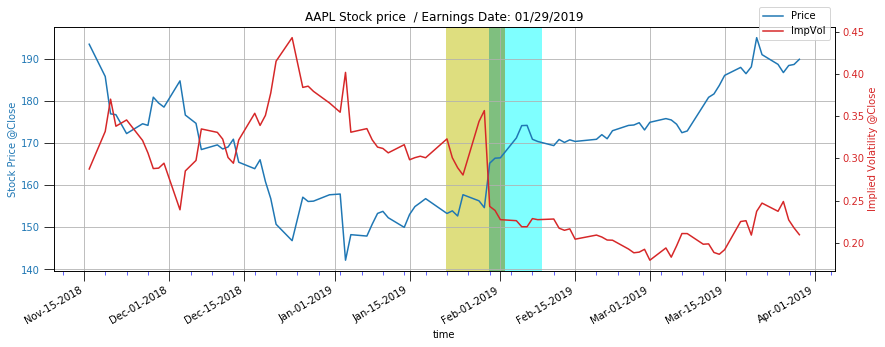

Earning Price Max:   19.56
Earning Price Min:   -4.68
Earning Price Max % Delta:   11.23
Earning Price Min % Delta:   -3.12


,date,close,earningDayPriceDelta,earningDayPercentDelta
date,,,,
2019-01-14,2019-01-14,150.00,-4.68,-3.12
2019-01-15,2019-01-15,153.07,-1.61,-1.05
2019-01-16,2019-01-16,154.94,0.26,0.17
2019-01-17,2019-01-17,155.86,1.18,0.76
2019-01-18,2019-01-18,156.82,2.14,1.36
2019-01-22,2019-01-22,153.30,-1.38,-0.90
2019-01-23,2019-01-23,153.92,-0.76,-0.49
2019-01-24,2019-01-24,152.70,-1.98,-1.30
2019-01-25,2019-01-25,157.76,3.08,1.95


Earning ImpVol Max:   0.0
Earning ImpVol Min:   -0.14
Earning ImpVol Max % Delta:   0.0
Earning ImpVol Min % Delta:   -66.0


,date,close,earningDayIVPriceDelta,earningDayIVPercentDelta
date,,,,
2019-01-14,2019-01-14,0.316188,-0.04,-13.0
2019-01-15,2019-01-15,0.298330,-0.06,-20.0
2019-01-16,2019-01-16,0.300822,-0.06,-19.0
2019-01-17,2019-01-17,0.302521,-0.05,-18.0
2019-01-18,2019-01-18,0.300695,-0.06,-19.0
2019-01-22,2019-01-22,0.323062,-0.03,-10.0
2019-01-23,2019-01-23,0.300774,-0.06,-19.0
2019-01-24,2019-01-24,0.288884,-0.07,-23.0
2019-01-25,2019-01-25,0.280280,-0.08,-27.0


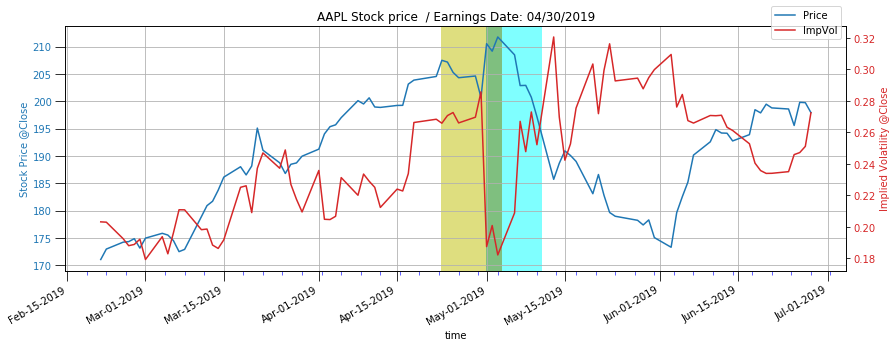

Earning Price Max:   11.08
Earning Price Min:   -14.95
Earning Price Max % Delta:   5.23
Earning Price Min % Delta:   -8.05


,date,close,earningDayPriceDelta,earningDayPercentDelta
date,,,,
2019-04-15,2019-04-15,199.23,-1.44,-0.72
2019-04-16,2019-04-16,199.25,-1.42,-0.71
2019-04-17,2019-04-17,203.13,2.46,1.21
2019-04-18,2019-04-18,203.86,3.19,1.56
2019-04-22,2019-04-22,204.53,3.86,1.89
2019-04-23,2019-04-23,207.48,6.81,3.28
2019-04-24,2019-04-24,207.16,6.49,3.13
2019-04-25,2019-04-25,205.28,4.61,2.25
2019-04-26,2019-04-26,204.30,3.63,1.78


Earning ImpVol Max:   0.03
Earning ImpVol Min:   -0.1
Earning ImpVol Max % Delta:   11.0
Earning ImpVol Min % Delta:   -57.0


,date,close,earningDayIVPriceDelta,earningDayIVPercentDelta
date,,,,
2019-04-15,2019-04-15,0.223989,-0.06,-28.0
2019-04-16,2019-04-16,0.222799,-0.06,-28.0
2019-04-17,2019-04-17,0.233816,-0.05,-22.0
2019-04-18,2019-04-18,0.266279,-0.02,-7.0
2019-04-22,2019-04-22,0.268343,-0.02,-6.0
2019-04-23,2019-04-23,0.265819,-0.02,-7.0
2019-04-24,2019-04-24,0.270660,-0.02,-6.0
2019-04-25,2019-04-25,0.272613,-0.01,-5.0
2019-04-26,2019-04-26,0.266009,-0.02,-7.0


In [11]:
colorStock = 'tab:blue'
colorImpVol = 'tab:red'
xLabel = 'time'
yLabelStock = 'Stock Price @Close';
yLabelImpVol = 'Implied Volatility @Close';
ax1LegendLabel = "Price"
ax2LegendLabel = "ImpVol"

locator = mdates.AutoDateLocator(minticks=5, maxticks=15)
formatter = mdates.ConciseDateFormatter(locator)
myFmt = DateFormatter("%b-%d-%Y")


for earn in range(0, len(earningsCalendar)): # for all the dates in earningsCalendar
    fig, ax1 = plt.subplots(figsize=(14,5)); # single Plot

    theTitle = theStock + " Stock price "+ " / Earnings Date: " + earningsCalendar.EarningStrDate.at[earn][0]
    impVolDataHeaderStockString = '<hr> <strong><span style="color: #ff0000; font-family: arial, helvetica, sans-serif; font-size: large;"> ' + theStock 

    dataHeaderEarningDateString = '<br></span></strong><span style="font-size: small; color: #008000;"><strong><span style="font-family: arial, helvetica, sans-serif;">Earning Date &#9884 ' \
    + earningsCalendar.EarningStrDate.at[earn][0] + '<hr> '
    
    impVolDataHeader = impVolDataHeaderStockString  + ' &#9830; ImpVol ' + dataHeaderEarningDateString
    
    priceHeaderDataHeaderStockString = '<hr> <strong><span style="color: blue; font-family: arial, helvetica, sans-serif; font-size: large;"> ' + theStock 

    priceHeader = priceHeaderDataHeaderStockString  + ' &#9830; Price ' + dataHeaderEarningDateString

    
    
    ax1.set_title(theTitle);

    ax1.set_xlabel(xLabel);
    ax1.set_ylabel(yLabelStock, color=colorStock);
    ax1.plot(earningsPastStock[earn]['date'], earningsPastStock[earn]['close'], color=colorStock, label=ax1LegendLabel);
    ax1.tick_params(axis='y', labelcolor=colorStock);
    ax1.grid(True);

    # instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx();
    ax2.set_ylabel(yLabelImpVol, color=colorImpVol)  # we already handled the x-label with ax1
    ax2.plot(earningsPastImpVol[earn]['date'] ,earningsPastImpVol[earn]['close'], color=colorImpVol, label=ax2LegendLabel)
    ax2.tick_params(axis='y', labelcolor=colorImpVol)

    #build Legend for 2 Xaxis
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, bbox_to_anchor=(1.0, 1.1))

    #set up Major/Minor xAxis 
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(formatter)

    # Format xAxis Date
    ax1.xaxis.set_major_formatter(myFmt)
    ax1.tick_params(which='major', length=10)
    ax1.tick_params(which='minor', length=4, color='b')
    ax1.xaxis.set_minor_locator(AutoMinorLocator())
    
    ax1.axvspan(mdates.date2num(earningsCalendar['EarningDateTime'][earn]),
                mdates.date2num(earningsCalendar['EarningDateTime'][earn]+datetime.timedelta(days=3)),
                facecolor='g', alpha=0.5)
    ax1.axvspan(mdates.date2num(earningsCalendar['EarningDateTime'][earn]),
                mdates.date2num(earningsCalendar['EarningDateTime'][earn]-datetime.timedelta(days=8)),
                facecolor='y', alpha=0.5)
    ax1.axvspan(mdates.date2num(earningsCalendar['EarningDateTime'][earn]+datetime.timedelta(days=3)),
                mdates.date2num(earningsCalendar['EarningDateTime'][earn]+datetime.timedelta(days=10)),
                facecolor='aqua', alpha=0.5)

    fig.autofmt_xdate()
    plt.show()
    
    #=========================================================================================================
#     #get earning date
#     print(earningsCalendar.loc[:,:])
#     print(earningsCalendar.EarningDateTime[earn])

    # recreate index as the 'date' column 
    ePS2 = earningsPastStock[earn].set_index("date", drop=False)
    ePS2.index = pd.to_datetime(ePS2.index)

    onEarningDate = earningsCalendar.EarningDateTime[earn].date()
    onEarningDatePast = onEarningDate - datetime.timedelta(days=15)
    onEarningDateForward = onEarningDate + datetime.timedelta(days=15)

    # Create new dataframe from old // old[['A', 'C', 'D']].copy()
    # Create a new df and set index to date
    onEarningDatePastdf=(ePS2.loc[onEarningDatePast:onEarningDateForward,['date','close']].copy()).set_index("date", drop=False)

    # Let’s add a new column ‘Percentage’ where entry at each index will be calculated by the values in other columns at that index i.e.
    # dfObj['Percentage'] =  (dfObj['Marks'] / dfObj['Total'] ) * 100
    x=earningsCalendar.EarningDateTime[earn].date()
    onEarningDatePastdf['earningDayPriceDelta'] = round((onEarningDatePastdf['close'] - ePS2.close.at[x]),2)
    onEarningDatePastdf['earningDayPercentDelta'] = round(100-((ePS2.close.at[x]/onEarningDatePastdf['close'])*100),2)

    display(HTML(priceHeader))
    print('Earning Price Max:  ', onEarningDatePastdf.earningDayPriceDelta.max())
    print('Earning Price Min:  ', onEarningDatePastdf.earningDayPriceDelta.min())
    print('Earning Price Max % Delta:  ', onEarningDatePastdf.earningDayPercentDelta.max())
    print('Earning Price Min % Delta:  ', onEarningDatePastdf.earningDayPercentDelta.min())
    display(onEarningDatePastdf)

    #-----------------------------------
    # recreate index as the 'date' column 
    ePIV2 = earningsPastImpVol[earn].set_index("date", drop=False)
    ePIV2.index = pd.to_datetime(ePIV2.index)

    # Create new dataframe from old // old[['A', 'C', 'D']].copy()
    # Create a new df and set index to date
    onEarningDatePastIVdf=(ePIV2.loc[onEarningDatePast:onEarningDateForward,['date','close']].copy()).set_index("date", drop=False)
    
    display(HTML(impVolDataHeader))
    
    onEarningDatePastIVdf['earningDayIVPriceDelta'] = round(onEarningDatePastIVdf['close'] - ePIV2.close.at[x],2)
    onEarningDatePastIVdf['earningDayIVPercentDelta'] = round(100-round(((ePIV2.close.at[x]/onEarningDatePastIVdf['close'])*100),2))
    print('Earning ImpVol Max:  ', onEarningDatePastIVdf.earningDayIVPriceDelta.max())
    print('Earning ImpVol Min:  ', onEarningDatePastIVdf.earningDayIVPriceDelta.min())
    print('Earning ImpVol Max % Delta:  ', onEarningDatePastIVdf.earningDayIVPercentDelta.max())
    print('Earning ImpVol Min % Delta:  ', onEarningDatePastIVdf.earningDayIVPercentDelta.min())
    display(onEarningDatePastIVdf)
    display(HTML('<hr>'))
